## Creating Quantum Functions with Pennylane

PennyLane works by integrating machine learning libraries with quantum simulators and hardware, giving users the power to train quantum circuits

PennyLane’s uses NumPy to perform computations, but connects with machine learning libraries like PyTorch and Tensorflow for writing programs.PennyLane is built with default simulator devices, and connected with external software and hardware to run quantum circuits like IBM’s Qiskit, or Google’s Cirq.

The main advantage of using PennyLane is to control and manipulate parametrized quantum circuits or variational circuits on quantum devices, and if we use PennyLane we can easy feed these circuits to quantum neural networks. Using PennyLane, we can easily find and operate gradients of quantum circuits, which is essential for the machine learning package to perform backpropagation.

In [ ]:
# Comment this out if you don't want to install pennylane from this notebook
!pip install pennylane


In [1]:
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt

## 1. Quantum nodes

Quantum computations are represented as quantum node objects in PennyLane. A quantum node is an initialization of the quantum circuit, and encapsulates the computation to the specific quantum device that executes the circuit. Quantum nodes can be easily created by using the qnode decorator.

In PennyLane, a *quantum node* is a computational unit that involves the construction, evaluation, pre- and postprocessing of quantum computations.

A quantum node consists of a *quantum function* that defines a circuit, as well as a *device* on which it is run. 

To combine the device with a quantum function to a quantum node we can use the `qml.qnode` decorator. The function can then be evaluated as if it was any other python function. Internally, it will construct a circuit and run it on the device.

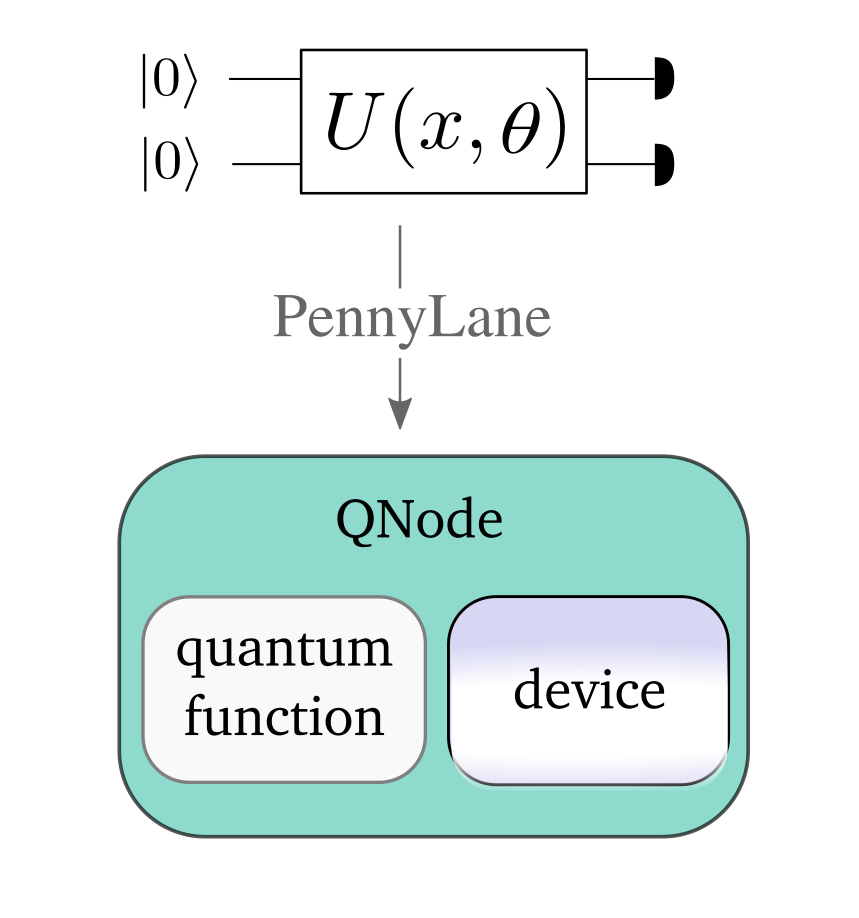

Instead of the qubit, PennyLane uses the term wires to refer to a quantum subsystem. The quantum function returns either a single or a tuple of measured observable values, by applying a measurement function, which in the function abive is the PauliZ operator to the qubit 1

In [ ]:
def quantum_function(x, y):
    qml.RZ(x, wires=0)
    qml.CNOT(wires=[0,1])
    qml.RY(y, wires=1)
    return qml.expval(qml.PauliZ(1))

There is a growing [device ecosystem](https://pennylane.ai/plugins.html) which allows you to change only one line of code to dispatch your quantum computation to local simulators, remote simulators and remote hardware from different vendors.

To run and optimize a quantum circuit, we need to specify the quantum device on which to execute the circuit. The device is an instance or object of the Device class. Here we will use the built-in `default.qubit` device. It is instantiated using the device loader as follows

In [ ]:
dev = qml.device('default.qubit', wires=2, shots=1000, analytic=False)


A QNode is initialized as follows:

In [ ]:
circuit = qml.QNode(quantum_function, dev)

The QNode is used to compute the result of a quantum circuit and can calculate results classically. For example, we will run the results of the quantum_function by creating a QNode circuit and passing the parameters x and y in the function quantum_function. Then an RZ gate, CNOT and RY will be applied on the circuit.

In [ ]:
circuit(np.pi/3, 0.5)
print(circuit.draw())

As we can see above, an RZ gate followed by a CX gate and RY gate is applied

## Basic States

For 1 qubit,
$$
\begin{gathered}
\left| 0 \right> = (1 0) \\
\left| 1 \right> = (0 1)
\end{gathered}
$$

In [4]:
dev1 = qml.device('default.qubit', wires=1)
dev2 = qml.device('default.qubit', wires=2)

In [5]:
@qml.qnode(dev1)
def zero():
    return qml.probs(wires=0)

@qml.qnode(dev1)
def one():
    qml.PauliX(wires=0)
    return qml.probs(wires=0)

@qml.qnode(dev1)
def zero_Z():
    return qml.expval(qml.PauliZ(0))

@qml.qnode(dev1)
def one_Z():
    qml.PauliX(wires=0)
    return qml.expval(qml.PauliZ(0))

$$
\sigma_x|0\rangle = |1\rangle \\
\sigma_x|1\rangle = |0\rangle
$$
$$
\sigma_z|0\rangle = |0\rangle \\
\sigma_z|1\rangle = -|1\rangle
$$

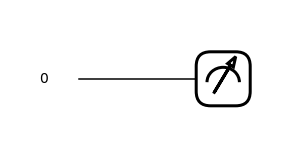

In [6]:
fig, ax = qml.draw_mpl(zero)()
plt.show()

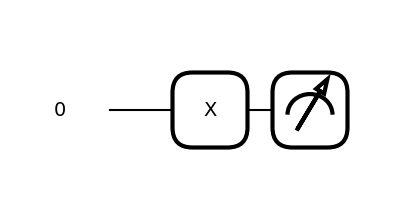

In [7]:
fig, ax = qml.draw_mpl(one)()
plt.show()

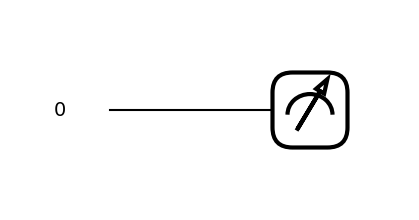

In [8]:
qml.draw_mpl(zero_Z)()
plt.show()

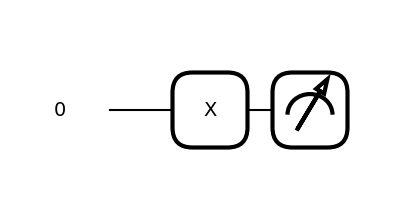

In [9]:
qml.draw_mpl(one_Z)()
plt.show()

In [10]:
zero()

tensor([1., 0.], requires_grad=True)

In [ ]:
one()

In [ ]:
zero_Z()

In [ ]:
one_Z()

For 2 qubit,

$$
\begin{gathered}
\left| 00 \right> = (1 0 0 0) \\
\left| 01 \right> = (0 1 0 0) \\
\left| 10 \right> = (0 0 1 0) \\
\left| 11 \right> = (0 0 0 1)
\end{gathered}
$$

In [12]:
@qml.qnode(dev2)
def zerozero():
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def zeroone():
    qml.PauliX(wires=1)
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def onezero():
    qml.PauliX(wires=0)
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def oneone():
    qml.PauliX(wires=0)
    qml.PauliX(wires=1)
    return qml.probs(wires=[0,1])

@qml.qnode(dev2)
def zeroone_Z():
    qml.PauliX(wires=1)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

@qml.qnode(dev2)
def onezero_Z():
    qml.PauliX(wires=0)
    return qml.expval(qml.PauliZ(0) @ qml.PauliZ(1))

In [ ]:
zerozero()

In [ ]:
zeroone()

In [ ]:
onezero()

In [ ]:
oneone()

In [ ]:
fig, ax = qml.draw_mpl(oneone)()
plt.show()

In [ ]:
zeroone_Z()

In [ ]:
qml.draw_mpl(zeroone_Z)()
plt.show()

In [ ]:
onezero_Z()

In [ ]:
qml.draw_mpl(onezero_Z)()
plt.show()

## Hadamard Gate

$$
H\left|x\right> = \frac{1}{\sqrt{2}}\left(\left|0\right> + (-1)^x \left|1\right>\right)
$$

In [ ]:
x_zero = [0]
x_one  = [1]

In [ ]:
fig, ax = qml.draw_mpl(hadamard_gate)(x_zero)
plt.show()

In [ ]:
hadamard_gate(x_zero)

In [ ]:
hadamard_gate(x_one)